## Calcuating Sharpe Ration and Drawdown

Pick a trivial long-only strategy for IGE: buying and holding a share since the close of November 26, 2001, and selling
it at close of November 14, 2007. Assume the average risk-free rate during this period is 4 percent per annum.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_style('whitegrid')
%matplotlib inline

from pandas_datareader import DataReader
from datetime import datetime

In [2]:
start = datetime(2001, 11, 26)
end = datetime(2007, 11, 14)
reader = DataReader('IGE', 'yahoo', start, end)

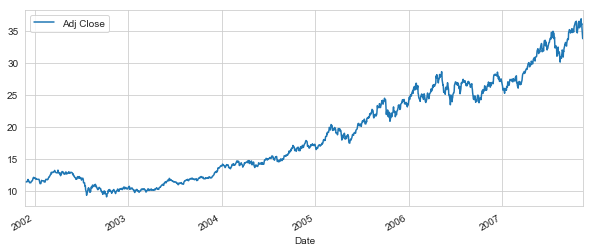

In [3]:
ac = reader['Adj Close']
ac.plot(legend=True, figsize=(10, 4))

Drawdown  0.22045459871996104 23.438217163085938 28.60527992248535


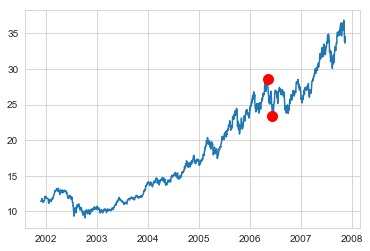

In [4]:
# Max Drawdown
i = (np.maximum.accumulate(ac) - ac).idxmax() # end of the period
j = (ac[:i]).idxmax() # start of period

plt.plot(ac)
plt.plot([i, j], [ac[i], ac[j]], 'o', color='Red', markersize=10)
dd = ( ac[j] - ac[i] ) / ac[i]

print("Drawdown ", dd, ac[i], ac[j])

In [5]:
# Sharpe Ratio

# SR = (R_p - R_f) / σ_p
# Where R_p is the return of portfolio, R_f is the risk free return and σ_p is the standard 
# deviation of the portfolo excess return

daily_ret = ac.pct_change()
excess_ret = daily_ret - 0.04 / 252

sharpe_ratio = math.sqrt(252) * excess_ret.mean() / excess_ret.std()
print(sharpe_ratio)

0.7660476253356294


In [6]:
# Now try the same but use SPY as the benchmark

reader_spx = DataReader('^GSPC', 'yahoo', start, end)
reader_spx['Daily Ret'] = reader_spx['Adj Close'].pct_change()
excess_ret_spx = daily_ret - reader_spx['Daily Ret']

sharpe_ratio_spx = math.sqrt(252) * excess_ret_spx.mean() / excess_ret_spx.std()
print(sharpe_ratio_spx)

0.8679133878492084
